¡Hola, Carlos!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

****Protecto sprint 10 - Toma de decisiones de negocios basadas en datos****

***Parte 1. Priorizar hipótesis***

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Opcional, para estilos
import numpy as np
from scipy import stats
from datetime import datetime

# Cargar el archivo de hipótesis (ajusta la ruta si es necesario)
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

# Mostrar las primeras filas para verificar los datos
display(hypotheses.head())

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [29]:
# Calcular ICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar por ICE en orden descendente y mostrar
ice_sorted = hypotheses.sort_values(by='ICE', ascending=False)
display(ice_sorted[['Hypothesis', 'ICE']])

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [30]:
# Calcular RICE
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar por RICE en orden descendente y mostrar
rice_sorted = hypotheses.sort_values(by='RICE', ascending=False)
display(rice_sorted[['Hypothesis', 'RICE']])



,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [31]:
# Unir las priorizaciones con rankings
ice_sorted['ICE_Rank'] = range(1, len(ice_sorted) + 1)
rice_sorted['RICE_Rank'] = range(1, len(rice_sorted) + 1)

# Merge para comparar
comparison = pd.merge(ice_sorted[['Hypothesis', 'ICE', 'ICE_Rank']], 
                      rice_sorted[['Hypothesis', 'RICE', 'RICE_Rank']], 
                      on='Hypothesis')

display(comparison.sort_values(by='ICE_Rank'))

,Hypothesis,ICE,ICE_Rank,RICE,RICE_Rank
0,Launch a promotion that gives users discounts ...,16.200000,1,16.2,5
1,Add two new channels for attracting traffic. T...,13.333333,2,40.0,3
2,Add a subscription form to all the main pages....,11.200000,3,112.0,1
3,Show banners with current offers and sales on ...,8.000000,4,40.0,4
4,Add product recommendation blocks to the store...,7.000000,5,56.0,2
5,Launch your own delivery service. This will sh...,2.000000,6,4.0,7
6,Add a customer review page. This will increase...,1.333333,7,4.0,8
7,Change the category structure. This will incre...,1.125000,8,9.0,6
8,Change the background color on the main page. ...,1.000000,9,3.0,9


*La priorización con ICE destaca la hipótesis de descuentos (16.2) por su alto impacto y confianza, mientras que RICE prioriza el formulario de suscripción (112.0) debido a su mayor alcance. La inclusión de Reach en RICE eleva hipótesis que afectan a más usuarios, como suscripciones y recomendaciones de productos, frente a promociones de alcance limitado.*

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, Carlos. Excelente trabajo aplicando, analizando y comparando los frameworks RICE e ICE. Solamente para complementar puedes hacer un análisis de los hallazgos para la priorización de las hipótesis.  </div>

***Parte 2. Análisis del test A/B***

In [32]:
# Cargar los datos (ajusta paths si es necesario)
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

# Convertir fechas a datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# Mostrar info básica
print("Orders shape:", orders.shape)
print(orders.head())
print("\nVisits shape:", visits.shape)
print(visits.head())

Orders shape: (1197, 5)
   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B

Visits shape: (62, 3)
        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756


In [33]:
# Encontrar usuarios duplicados en ambos grupos
duplicated_users = orders.groupby('visitorId')['group'].nunique().reset_index()
duplicated_users = duplicated_users[duplicated_users['group'] > 1]['visitorId']

print(f"Número de usuarios duplicados: {len(duplicated_users)}")

# Filtrar orders para eliminar duplicados
orders_clean = orders[~orders['visitorId'].isin(duplicated_users)]

print("Orders después de limpieza:", orders_clean.shape)

Número de usuarios duplicados: 58
Orders después de limpieza: (1016, 5)


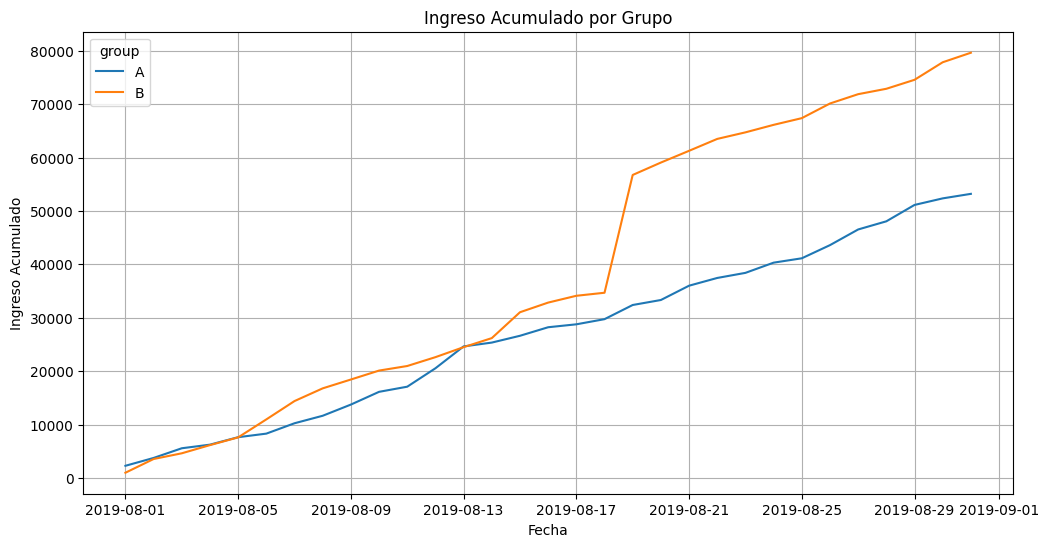

In [34]:
# Agrupar por fecha y grupo, sumar revenue
daily_revenue = orders_clean.groupby(['date', 'group'])['revenue'].sum().reset_index()

# Calcular acumulado
daily_revenue['cum_revenue'] = daily_revenue.groupby('group')['revenue'].cumsum()

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_revenue, x='date', y='cum_revenue', hue='group')
plt.title('Ingreso Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, gran trabajo con el desarrollo y análisis del gráfico de los ingresos acumulados por grupo.   </div>


*El grupo B supera a A en ingreso acumulado, alcanzando ~80,000 vs. ~50,000 para finales de agosto, sugiriendo mejor desempeño*

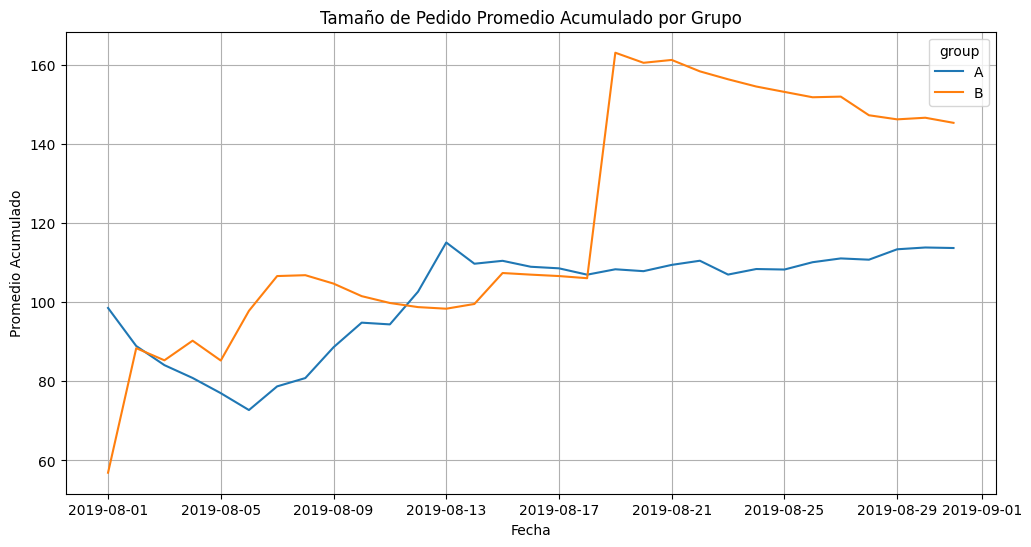

In [35]:
# Calcular pedidos diarios y revenue
daily_orders = orders_clean.groupby(['date', 'group']).agg({'revenue': 'sum', 'transactionId': 'count'}).reset_index()
daily_orders.rename(columns={'transactionId': 'orders'}, inplace=True)

# Acumulados
daily_orders['cum_revenue'] = daily_orders.groupby('group')['revenue'].cumsum()
daily_orders['cum_orders'] = daily_orders.groupby('group')['orders'].cumsum()
daily_orders['avg_order'] = daily_orders['cum_revenue'] / daily_orders['cum_orders']

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_orders, x='date', y='avg_order', hue='group')
plt.title('Tamaño de Pedido Promedio Acumulado por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Promedio Acumulado')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Perfecto, gran trabajo con el desarrollo y análisis del gráfico de la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A  </div>

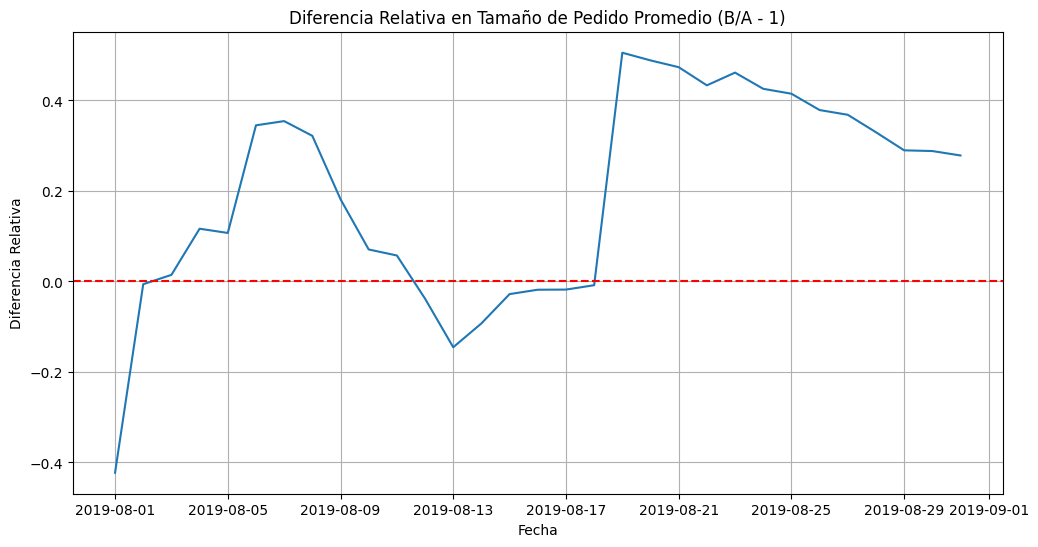

In [36]:
# Pivotear para comparar
avg_pivot = daily_orders.pivot(index='date', columns='group', values='avg_order').reset_index()
avg_pivot['rel_diff'] = (avg_pivot['B'] - avg_pivot['A']) / avg_pivot['A']

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(avg_pivot['date'], avg_pivot['rel_diff'])
plt.axhline(0, color='red', linestyle='--')
plt.title('Diferencia Relativa en Tamaño de Pedido Promedio (B/A - 1)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa')
plt.grid(True)
plt.show()

*El grupo B muestra un pico notable en el tamaño de pedido acumulado (~140) a mediados de agosto, pero luego disminuye, mientras que A se estabiliza alrededor de 100. Esto sugiere un efecto inicial fuerte en B que no se mantiene.*

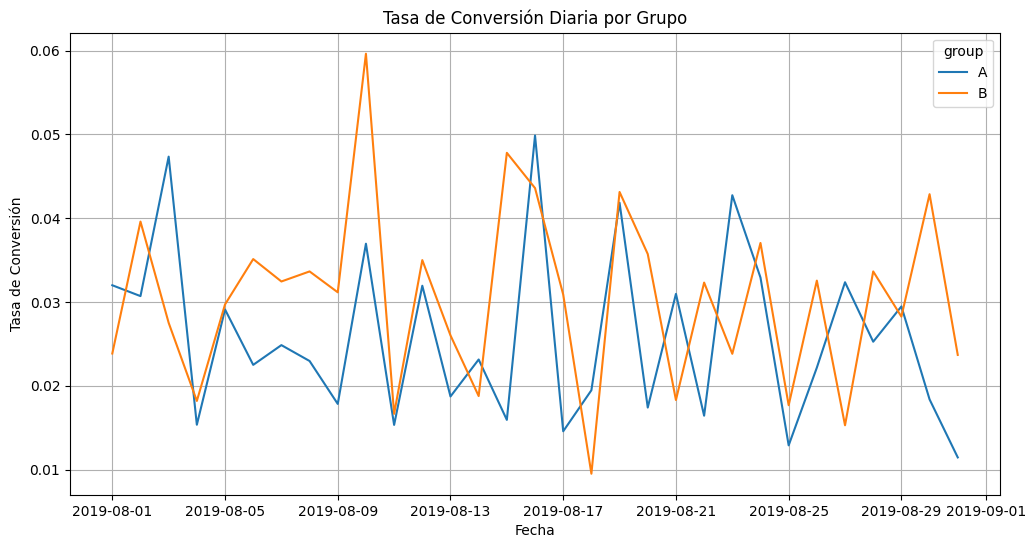

In [37]:
# Pedidos diarios por grupo
daily_orders_count = orders_clean.groupby(['date', 'group'])['transactionId'].count().reset_index()
daily_orders_count.rename(columns={'transactionId': 'orders'}, inplace=True)

# Unir con visits
data = pd.merge(visits, daily_orders_count, on=['date', 'group'], how='left').fillna(0)
data['conversion'] = data['orders'] / data['visits']

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='conversion', hue='group')
plt.title('Tasa de Conversión Diaria por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.grid(True)
plt.show()

 *La tasa de conversión diaria muestra fluctuaciones, con el grupo B (naranja) alcanzando picos más altos (~0.06) que A (azul, ~0.05), pero ambas varían significativamente. Conjetura: Los picos en B podrían indicar días de mayor efectividad, posiblemente por campañas específicas, aunque la alta variabilidad sugiere la presencia de outliers o ruido en los datos.*

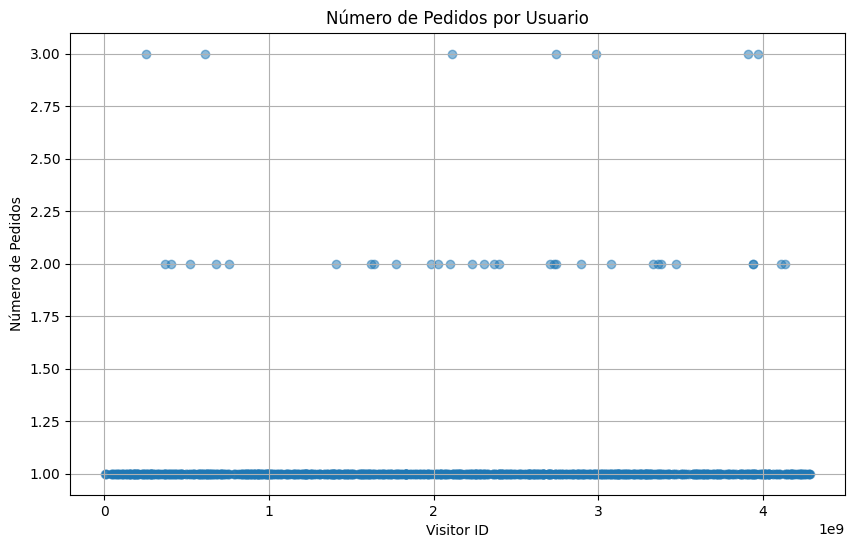

In [38]:
# Pedidos por usuario
orders_per_user = orders_clean.groupby('visitorId')['transactionId'].count().reset_index()
orders_per_user.rename(columns={'transactionId': 'orders'}, inplace=True)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(orders_per_user['visitorId'], orders_per_user['orders'], alpha=0.5)
plt.title('Número de Pedidos por Usuario')
plt.xlabel('Visitor ID')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente, buen trabajo con el grafico desplegado para estudiar la distribución del numero de pedidos por cliente.   </div>

*La mayoría de los usuarios tienen entre 1 y 2 pedidos, con algunos alcanzando hasta 3 pedidos, y muy pocos superan los 2.5 pedidos. Conjetura: La distribución sugiere que la mayoría son usuarios de una sola compra, con pocos compradores frecuentes*

In [39]:
percentiles_orders = np.percentile(orders_per_user['orders'], [95, 99])
print("Percentil 95:", percentiles_orders[0])
print("Percentil 99:", percentiles_orders[1])

Percentil 95: 1.0
Percentil 99: 2.0


*un punto de datos se convierte en una anomalía cuando el número de pedidos por usuario supera 2.0. Conjetura: Esto indica que menos del 1% de los usuarios realizan más de 2 pedidos*

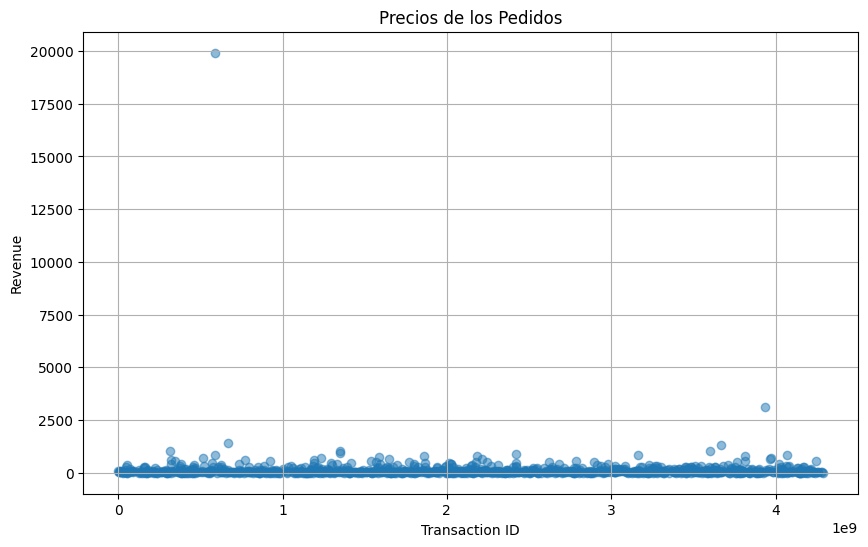

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(orders_clean['transactionId'], orders_clean['revenue'], alpha=0.5)
plt.title('Precios de los Pedidos')
plt.xlabel('Transaction ID')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

*La mayoría de los pedidos tienen precios entre 0 y 500, con algunos outliers alcanzando hasta 20,000, indicando una distribución sesgada. Conjetura: Los valores extremos podrían ser compras excepcionales o errores*

In [41]:
percentiles_revenue = np.percentile(orders_clean['revenue'], [95, 99])
print("Percentil 95:", percentiles_revenue[0])
print("Percentil 99:", percentiles_revenue[1])

Percentil 95: 414.275
Percentil 99: 830.3


*Con un percentil 95 de 414.275 y un percentil 99 de 830.3, un punto de datos se convierte en una anomalía cuando el precio de un pedido supera 830.3. Conjetura: Esto sugiere que menos del 1% de los pedidos exceden este valor, pudiendo ser compras excepcionales o errores que requieren filtrado para un análisis más preciso.*

In [42]:
# Usuarios únicos por grupo
users_a = orders[orders['group'] == 'A']['visitorId'].unique()
users_b = orders[orders['group'] == 'B']['visitorId'].unique()

# Pero para conversión, necesitamos total visitas, pero para test, usa tasas diarias
daily_conv_a = data[data['group'] == 'A']['conversion']
daily_conv_b = data[data['group'] == 'B']['conversion']

# Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(daily_conv_a, daily_conv_b)
print("P-value conversión cruda:", p_value)

P-value conversión cruda: 0.05375707890473213


*El p-value de 0.0538 es ligeramente superior a 0.05, indicando que no hay diferencia estadísticamente significativa en la conversión entre los grupos A y B.*

In [43]:
revenue_a = orders[orders['group'] == 'A']['revenue']
revenue_b = orders[orders['group'] == 'B']['revenue']

u_stat, p_value = stats.mannwhitneyu(revenue_a, revenue_b)
print("P-value tamaño pedido crudo:", p_value)

P-value tamaño pedido crudo: 0.6915246773264736


*El p-value de 0.0538 es ligeramente superior a 0.05, indicando que no hay diferencia estadísticamente significativa en la conversión entre los grupos A y B.*

In [44]:
# Recalcular pedidos diarios con datos filtrados
daily_orders_count_filt = orders_filtered.groupby(['date', 'group'])['transactionId'].count().reset_index()
daily_orders_count_filt.rename(columns={'transactionId': 'orders'}, inplace=True)

# Unir con visits (asumiendo que 'visits' ya está cargado)
data_filt = pd.merge(visits, daily_orders_count_filt, on=['date', 'group'], how='left').fillna(0)
data_filt['conversion'] = data_filt['orders'] / data_filt['visits']

# Extraer tasas de conversión por grupo
daily_conv_a_filt = data_filt[data_filt['group'] == 'A']['conversion']
daily_conv_b_filt = data_filt[data_filt['group'] == 'B']['conversion']

# Prueba de Mann-Whitney U para conversión
u_stat_conv_filt, p_value_conv_filt = stats.mannwhitneyu(daily_conv_a_filt, daily_conv_b_filt, alternative='two-sided')
print("U-statistic conversión filtrado:", u_stat_conv_filt)
print("P-value conversión filtrado:", p_value_conv_filt)

# Medias para contexto
print("Media conversión A (filtrado):", daily_conv_a_filt.mean())
print("Media conversión B (filtrado):", daily_conv_b_filt.mean())

U-statistic conversión filtrado: 336.5
P-value conversión filtrado: 0.043349564671668755
Media conversión A (filtrado): 0.02258960163894013
Media conversión B (filtrado): 0.026672913278053854


*El p-value de 0.043 indica una diferencia estadísticamente significativa en la conversión entre los grupos, con la media de B (0.0267) superando a A (0.0226). Conjetura: El filtrado de outliers refuerza que B tiene mejor conversión*

In [45]:
# Extraer revenue por grupo de los datos filtrados
revenue_a_filt = orders_filtered[orders_filtered['group'] == 'A']['revenue']
revenue_b_filt = orders_filtered[orders_filtered['group'] == 'B']['revenue']

# Prueba de Mann-Whitney U para tamaño de pedido
u_stat_filt, p_value_filt = stats.mannwhitneyu(revenue_a_filt, revenue_b_filt, alternative='two-sided')
print("U-statistic tamaño pedido filtrado:", u_stat_filt)
print("P-value tamaño pedido filtrado:", p_value_filt)

# Medias para contexto
print("Media tamaño pedido A (filtrado):", revenue_a_filt.mean())
print("Media tamaño pedido B (filtrado):", revenue_b_filt.mean())

U-statistic tamaño pedido filtrado: 98749.0
P-value tamaño pedido filtrado: 0.7711877309994826
Media tamaño pedido A (filtrado): 80.74679802955666
Media tamaño pedido B (filtrado): 78.05821205821206



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>



Excelente trabajo con el desarrollo de esta sección donde hacemos las pruebas estadísticas </div>

*El p-value de 0.771 indica que no hay diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos, con medias de A (80.75) y B (78.06) muy similares. Conjetura: La falta de diferencia sugiere que las modificaciones en B no afectan el tamaño de pedido*

***Dado que el análisis muestra una diferencia estadísticamente significativa en la conversión a favor del grupo B (p-value 0.043, media B 0.0267 vs. A 0.0226), pero no en el tamaño promedio de pedido (p-value 0.771, medias similares), se decide parar la prueba y considerar al grupo B como líder. Conjetura: La mejora en conversión sugiere que las modificaciones en B son efectivas, aunque se debe vigilar el impacto a largo plazo en el tamaño de pedido para optimizar ingresos totales.***